In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


%matplotlib inline

# 맨 마지막 column에 있는 not fully paid 를 예측하는 문제, 나머지 앞에 있는 data 들은 모두 금융정보에 관한 정보
# 대출 연체 예측가능성을 보는 모델을 만들고자함

## 1. Load the dataset

In [9]:
# loans_tr 데이터를 load
loan = pd.read_csv ("loans_tr.csv")

In [10]:
loan.head()

,Unnamed: 0,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## 2. Data Preprocessing

In [11]:
loan.head()

,Unnamed: 0,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [12]:
loan.drop ('Unnamed: 0', axis = 1, inplace = True)

In [13]:
loan = pd.get_dummies (loan)

In [14]:
loan.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [15]:
# checking how many NaN values for each variable
loan.isnull().values.any()

False

In [16]:
loan.isnull().sum()

credit.policy                 0
int.rate                      0
installment                   0
log.annual.inc                0
dti                           0
fico                          0
days.with.cr.line             0
revol.bal                     0
revol.util                    0
inq.last.6mths                0
delinq.2yrs                   0
pub.rec                       0
not.fully.paid                0
purpose_all_other             0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
dtype: int64

In [17]:
# checking the data type

loan.dtypes

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
not.fully.paid                  int64
purpose_all_other               uint8
purpose_credit_card             uint8
purpose_debt_consolidation      uint8
purpose_educational             uint8
purpose_home_improvement        uint8
purpose_major_purchase          uint8
purpose_small_business          uint8
dtype: object

In [18]:
# Convert the type 

In [19]:
loan ['purpose_all_other'] = loan ['purpose_all_other'].astype (float)
loan ['purpose_credit_card'] = loan ['purpose_credit_card'].astype (float)
loan ['purpose_debt_consolidation'] = loan ['purpose_debt_consolidation'].astype (float)
loan ['purpose_educational'] = loan ['purpose_educational'].astype (float)
loan ['purpose_home_improvement'] = loan ['purpose_home_improvement'].astype (float)
loan ['purpose_major_purchase'] = loan ['purpose_major_purchase'].astype (float)
loan ['purpose_small_business'] = loan ['purpose_small_business'].astype (float)

print (loan.dtypes)

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
not.fully.paid                  int64
purpose_all_other             float64
purpose_credit_card           float64
purpose_debt_consolidation    float64
purpose_educational           float64
purpose_home_improvement      float64
purpose_major_purchase        float64
purpose_small_business        float64
dtype: object


## 3. Data summarization 

In [20]:
print (loan.shape)

(8578, 20)


In [21]:
print (loan.groupby ('not.fully.paid').size())

not.fully.paid
0    7209
1    1369
dtype: int64


In [22]:
loan.corr (method = 'pearson')

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.294707,0.062103,0.037211,-0.091869,0.349143,0.093910,-0.188163,-0.106020,-0.528659,-0.077064,-0.058881,-0.164314,-0.025342,-0.000412,0.022491,-0.029174,0.007409,0.027427,-0.009068
int.rate,-0.294707,1.000000,0.273999,0.056816,0.224910,-0.716760,-0.121416,0.094840,0.470174,0.202270,0.153147,0.101192,0.160077,-0.123721,-0.040269,0.119792,-0.016209,-0.046602,-0.068236,0.149486
installment,0.062103,0.273999,1.000000,0.450253,0.045305,0.089496,0.184978,0.230325,0.076100,-0.010018,-0.004973,-0.030443,0.052030,-0.199021,-0.001185,0.156476,-0.091670,0.031487,-0.080616,0.142708
log.annual.inc,0.037211,0.056816,0.450253,1.000000,-0.055599,0.112590,0.335352,0.367308,0.054542,0.032232,0.031205,0.016343,-0.036337,-0.076449,0.069197,-0.028269,-0.118908,0.119971,-0.030683,0.090849
dti,-0.091869,0.224910,0.045305,-0.055599,1.000000,-0.241642,0.056547,0.186304,0.341397,0.025557,-0.029590,0.012653,0.039922,-0.124586,0.083887,0.178061,-0.037651,-0.090910,-0.080759,-0.067406
fico,0.349143,-0.716760,0.089496,0.112590,-0.241642,1.000000,0.261973,-0.014331,-0.542394,-0.185055,-0.213010,-0.148480,-0.154231,0.066527,-0.011042,-0.152375,-0.016450,0.095980,0.066944,0.064126
days.with.cr.line,0.093910,-0.121416,0.184978,0.335352,0.056547,0.261973,1.000000,0.228340,-0.024686,-0.040351,0.076099,0.074134,-0.032452,-0.050036,0.040788,-0.010527,-0.041174,0.070333,-0.024555,0.033828
revol.bal,-0.188163,0.094840,0.230325,0.367308,0.186304,-0.014331,0.228340,1.000000,0.199520,0.021213,-0.034534,-0.029588,0.049026,-0.064341,0.069591,0.003505,-0.033490,-0.000480,-0.061553,0.087821
revol.util,-0.106020,0.470174,0.076100,0.054542,0.341397,-0.542394,-0.024686,0.199520,1.000000,-0.014009,-0.041654,0.065690,0.081899,-0.136865,0.087944,0.211541,-0.052673,-0.115864,-0.105827,-0.060896
inq.last.6mths,-0.528659,0.202270,-0.010018,0.032232,0.025557,-0.185055,-0.040351,0.021213,-0.014009,1.000000,0.025316,0.074123,0.150284,0.016302,-0.030982,-0.041997,0.020223,0.043345,-0.006030,0.045228


In [23]:
# inq.last.6mths & int.rate have the highest correlation with not.fully.paid column

## 4. Data visualization

In [24]:
# Determine the size of fugures made by pyplot
plt.rcParams ['figure.figsize'] = (20,20)

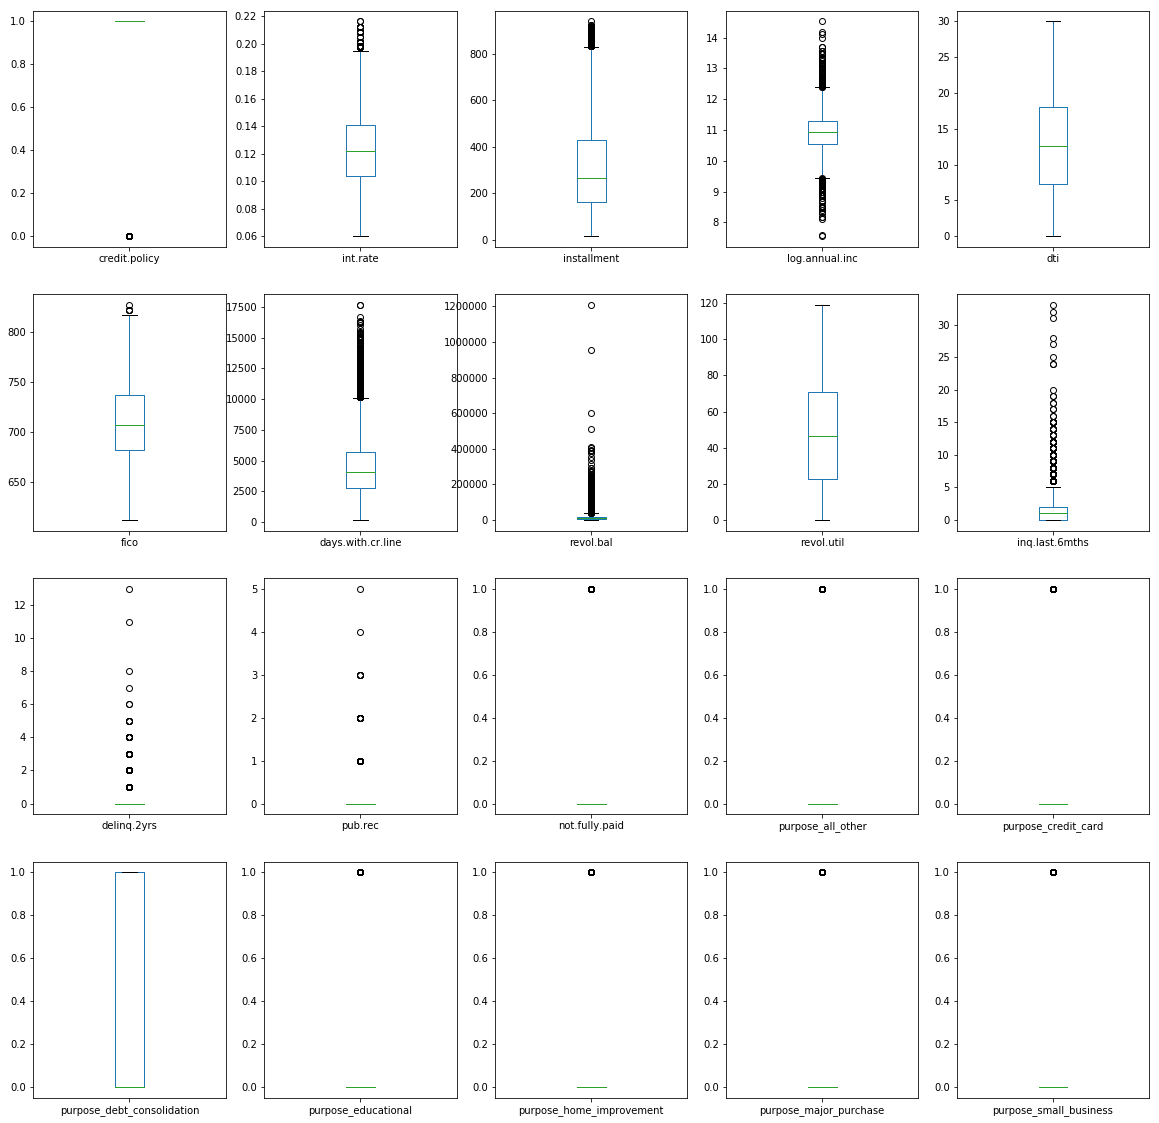

In [25]:
# Exploratory Data Aanalysis
loan.plot ( kind = 'box', subplots = True, layout = (4,5) )
plt.show()

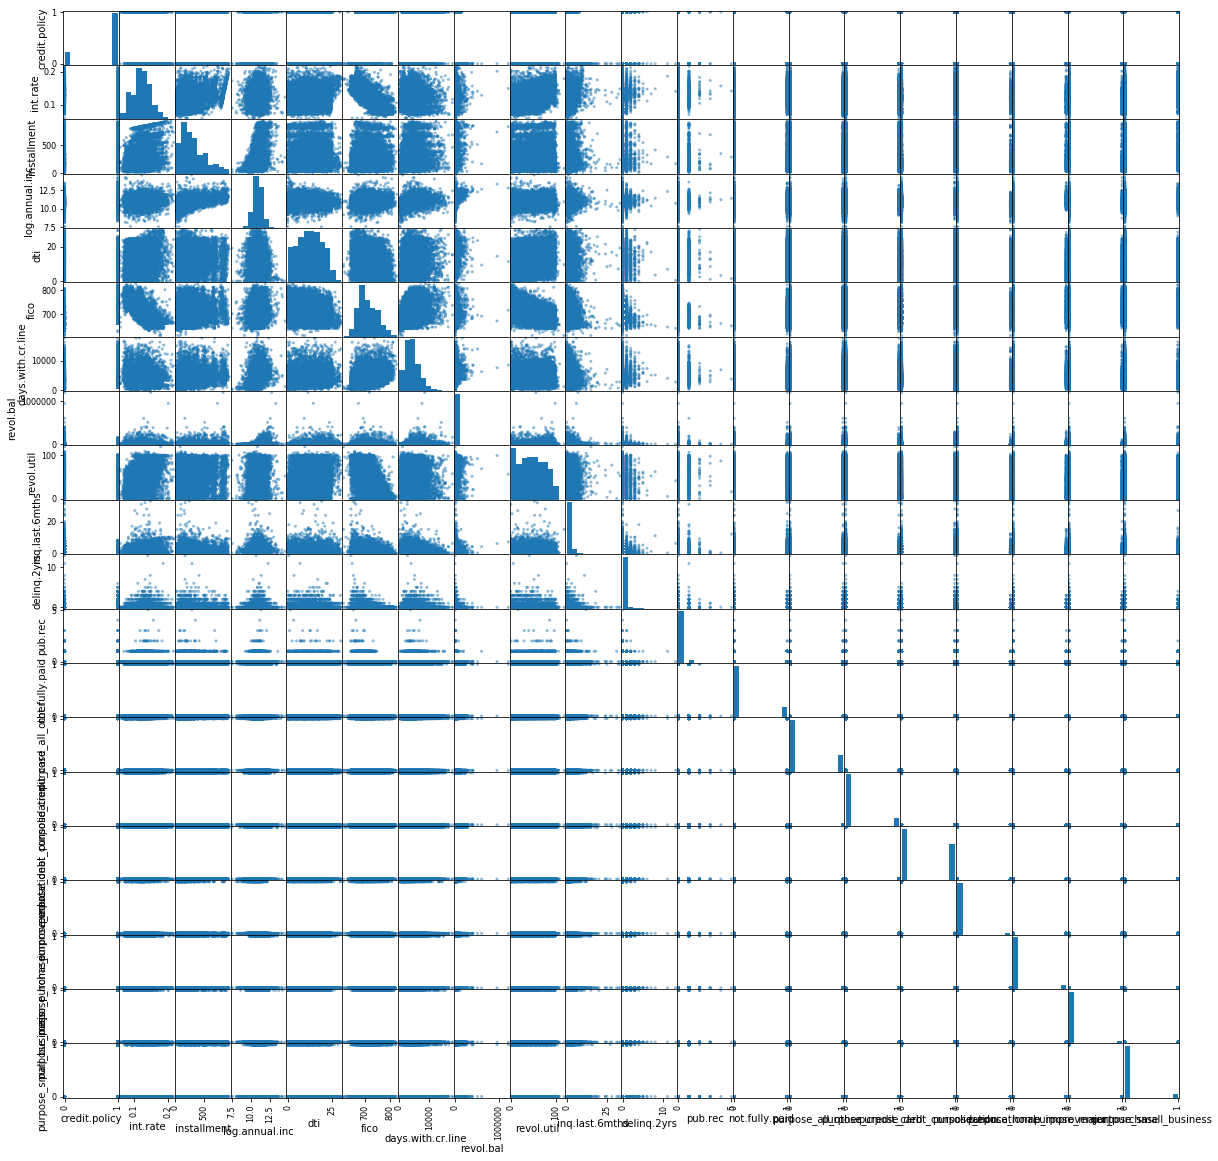

In [26]:
scatter_matrix (loan)
plt.show()

In [27]:
# Object type data 

loan.dtypes

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
not.fully.paid                  int64
purpose_all_other             float64
purpose_credit_card           float64
purpose_debt_consolidation    float64
purpose_educational           float64
purpose_home_improvement      float64
purpose_major_purchase        float64
purpose_small_business        float64
dtype: object

## 5. Preparation

In [28]:
loan.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [29]:
loan.shape

(8578, 20)

In [30]:
# X_data, y_data division
from sklearn.model_selection import train_test_split
array = loan.values
X = array [:, 0:19]
y = array [:, 19]
validation_size = 0.2
seed = 15

In [31]:
# train data, test data division
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= validation_size, random_state = seed)

In [32]:
# Compare Algorithms - model selection
num_folds = 10
num_instances = len (X_train)
seed = 7
scoring = 'accuracy'
print (len (X_train))

6862


## 6. Learn models

In [33]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [34]:
import warnings
warnings.simplefilter('ignore')

models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB'

In [35]:
# cross validaton을 통해 optimal model selection

In [36]:
# pipeline을 활용해서 scaling하고 optimal model selection

In [38]:
results = []
names = []


for name, model in models :
    kf = KFold ( n_splits = num_folds, random_state = seed ) 
    cv_results = cross_val_score (model, X_train, y_train, cv = kf, scoring = scoring )
    results.append (cv_results)
    names.append (name)
    msg = "%s : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print (msg)


print (results)

LR : 0.967948 (0.031854)
LDA : 0.935878 (0.009827)
KNN : 0.933111 (0.006876)
CART : 1.000000 (0.000000)
NB : 0.914896 (0.010973)
RF : 0.982803 (0.005370)
[array([0.94177584, 0.93449782, 1.        , 0.93148688, 0.99854227,
       0.93731778, 1.        , 1.        , 0.93586006, 1.        ]), array([0.93886463, 0.93886463, 0.94606414, 0.9271137 , 0.91399417,
       0.93731778, 0.95189504, 0.93440233, 0.93148688, 0.93877551]), array([0.93158661, 0.930131  , 0.94169096, 0.93148688, 0.91836735,
       0.93294461, 0.94169096, 0.93294461, 0.92857143, 0.94169096]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([0.90247453, 0.91411936, 0.93148688, 0.91690962, 0.90233236,
       0.9154519 , 0.93586006, 0.90524781, 0.90670554, 0.91836735]), array([0.98835517, 0.98398836, 0.98833819, 0.98250729, 0.98104956,
       0.97376093, 0.99125364, 0.98396501, 0.97521866, 0.97959184])]


In [39]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))

In [40]:
pipelines

[('ScaledLR', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False))])),
 ('ScaledLDA', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001))])),
 ('ScaledKNN', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform'))])),
 ('ScaledCART', Pi

In [41]:
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 1.000000 (0.000000)
ScaledLDA: 0.935878 (0.009827)
ScaledKNN: 0.989653 (0.002299)
ScaledCART: 1.000000 (0.000000)
ScaledNB: 1.000000 (0.000000)
ScaledRF: 0.986158 (0.006990)


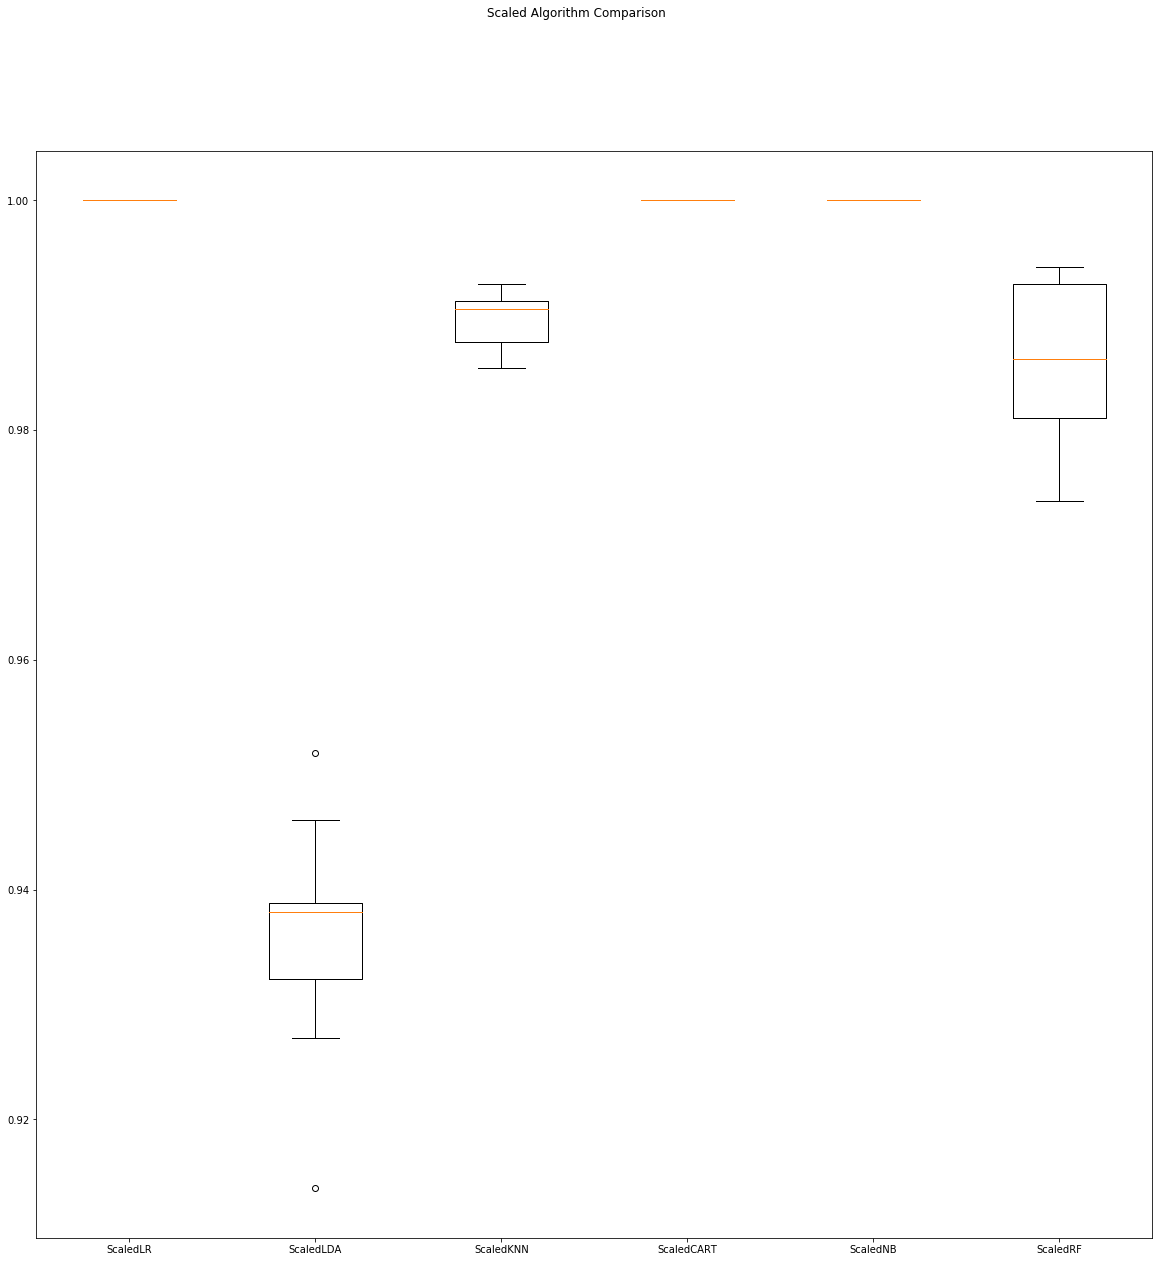

In [42]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [43]:
# Normalize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB', GaussianNB())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('RF', RandomForestClassifier())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold( n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 1.000000 (0.000000)
ScaledLDA: 0.935878 (0.009827)
ScaledKNN: 1.000000 (0.000000)
ScaledCART: 1.000000 (0.000000)
ScaledNB: 1.000000 (0.000000)
ScaledRF: 0.984554 (0.007604)


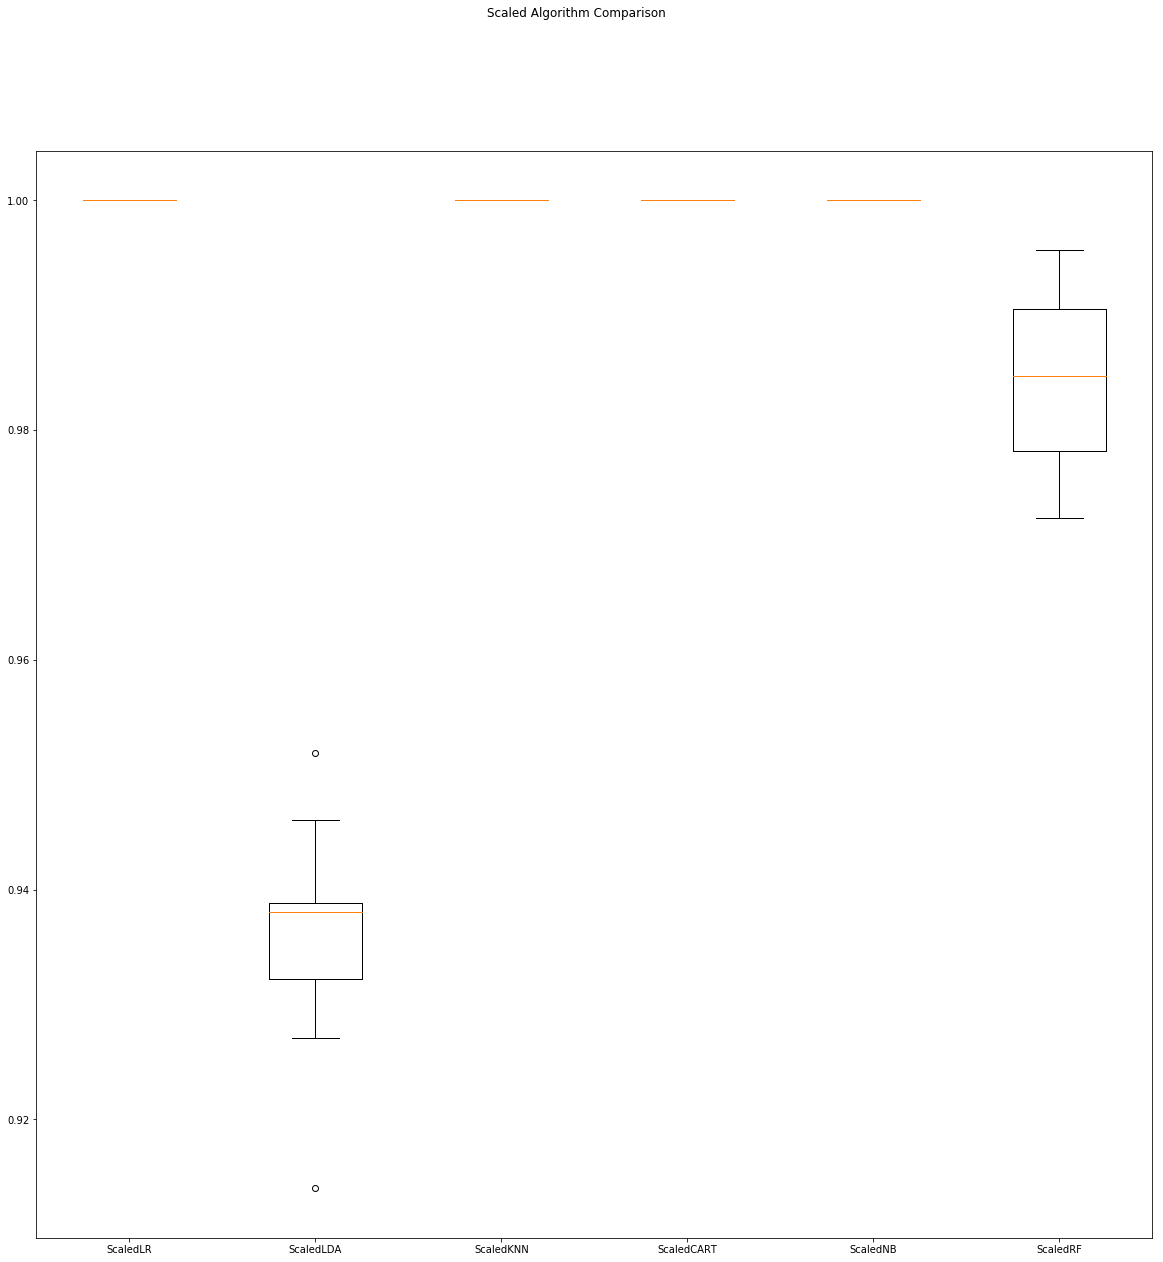

In [44]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [45]:
# Tune scaled-KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kf = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kf)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.993734 using {'n_neighbors': 1}


In [46]:
n_estimators_set = [5, 10, 15, 20, 25, 30, 35, 40]
max_features_set = ["sqrt", "log2", None]
param_grid = dict(n_estimators = n_estimators_set, max_features = max_features_set)
model = RandomForestClassifier()
kfold = KFold( n_splits = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))



Best: 1.000000 using {'max_features': None, 'n_estimators': 5}


In [47]:
n_estimators_set = [5, 10, 15, 20, 25, 30, 35, 40]
max_features_set = ["sqrt", "log2", None]
param_grid = dict(n_estimators = n_estimators_set, max_features = max_features_set)
model = RandomForestClassifier()
kfold = KFold( n_splits = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 1.000000 using {'max_features': None, 'n_estimators': 5}


In [48]:
best_RF = RandomForestClassifier(max_features='sqrt', n_estimators=20)
best_RF.fit(X_train, y_train)
best_RF.feature_importances_

array([0.00576097, 0.10139915, 0.07647913, 0.03844941, 0.0438075 ,
       0.05383687, 0.03772377, 0.05230805, 0.04499498, 0.02001587,
       0.00574628, 0.00263453, 0.00895713, 0.06757214, 0.08690368,
       0.1002154 , 0.05751207, 0.12017017, 0.07551291])

In [49]:
# ensemble 과 grid search를 활용한 model selection

In [50]:
# final test score - test data

In [51]:
model.fit (X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
loan_test = pd.read_csv ("loans_ts.csv")

In [53]:
loan_test.head()

,Unnamed: 0,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,8150,0,small_business,0.1299,505.34,11.407565,10.24,672,2250.000000,4162,68.4,14,0,1,1
1,7086,1,credit_card,0.1062,618.64,11.289782,13.29,737,5070.000000,14462,36.1,1,0,0,0
2,9374,0,all_other,0.1531,139.27,10.555813,8.34,667,3810.041667,1151,9.8,6,0,0,0
3,7439,1,home_improvement,0.1570,280.09,10.874266,7.36,662,4770.000000,10973,87.8,0,1,0,1
4,5345,1,credit_card,0.1531,870.39,11.727372,16.65,707,10590.000000,40413,85.6,0,0,0,0


In [54]:
loan_test.drop ('Unnamed: 0', axis = 1, inplace = True)

In [55]:
loan_test = pd.get_dummies(loan_test)

In [56]:
loan_test.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0,0.1299,505.34,11.407565,10.24,672,2250.000000,4162,68.4,14,0,1,1,0,0,0,0,0,0,1
1,1,0.1062,618.64,11.289782,13.29,737,5070.000000,14462,36.1,1,0,0,0,0,1,0,0,0,0,0
2,0,0.1531,139.27,10.555813,8.34,667,3810.041667,1151,9.8,6,0,0,0,1,0,0,0,0,0,0
3,1,0.1570,280.09,10.874266,7.36,662,4770.000000,10973,87.8,0,1,0,1,0,0,0,0,1,0,0
4,1,0.1531,870.39,11.727372,16.65,707,10590.000000,40413,85.6,0,0,0,0,0,1,0,0,0,0,0


In [57]:
array1 = loan_test.values
X_test_hat = array [:, 0:19]
Y_test_hat = array [:, 19]

In [58]:
final_pipelines = []
final_pipelines.append(('Tuned_KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier(n_neighbors = 11))])))
final_pipelines.append(('Tuned_RF', Pipeline([('RF', RandomForestClassifier(max_features = 'sqrt', n_estimators = 20))])))

In [59]:
final_pipelines

[('Tuned_KNN', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=11, p=2,
             weights='uniform'))])), ('Tuned_RF', Pipeline(memory=None,
       steps=[('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False))]))]

In [60]:
cm_t = []
accuracy_t = []
names_t = []
for name, model in final_pipelines:
    model.fit(X_train, y_train)
    Y_test_predict = model.predict(X_test_hat)
    cm_t.append(confusion_matrix(Y_test_hat, Y_test_predict))
    accuracy_t.append(accuracy_score(Y_test_hat, Y_test_predict))
    names_t.append(name)

In [61]:
names_t

['Tuned_KNN', 'Tuned_RF']

In [62]:
cm_t

[array([[8031,    0],
        [  99,  448]], dtype=int64), array([[8031,    0],
        [   7,  540]], dtype=int64)]